# DTSA 5511: GANs for Monet Paintings

## Topic

The following is going to be the creation of a GAN or Generative Adverserial Network that will take famous French painter Claude Monet's paintings are input and then output a figure in that likeness. There will be adjustments to the epochs and batch size as hyperparameters to modify the output. This method and type of information is important for those that wish to generate art through a computer. 

## Data

First, install all needed libraries.

In [128]:
!pip install opencv-python

Import the libraries afterward.

In [190]:
# Import Libraries
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Get the paths and declare empty list to take in image information.

In [191]:
path = "./monet/"
file_list = os.listdir(path)
image_list = list()
c1 = 0 # Counter for Image Viewing

Next, import the files into an image list for analysis after.

In [198]:
# For Loop to Go Through Files
for name in file_list:
    file_path = os.path.join(path, name)
    
    # If Image Run
    if name.endswith(".jpg") or name.endswith(".png"):
        image = cv2.imread(file_path)
        image_list.append(image)
        
        # Get Size, Dimension, Type
        size = os.path.getsize(file_path)
        dimension = image.shape
        img_type = image.dtype
        
        # Print Out First Three File Sizes
        if c1 < 3: 
            c1 += 1
            # Print the information
            print("File:", file_name)
            print("Size:", size, "bytes")
            print("Dimension:", dimension)
            print("Type:", img_type)
            print()

images = np.array(image_list)

print("===")

memory_size = images.nbytes
print("Memory Size:", memory_size, "bytes")
print("Size:", images.size)
print("Length:", len(images))

===
Memory Size: 117964800 bytes
Size: 117964800
Length: 600


Right off the bat, most of the files have similar dimensions being (256, 256, 3) and taking up the same magnitude of bytes. The memory  Next, resize to avoid any future issues with processing the data.

In [199]:
images = images.astype("float32") / 255.0

Just in case, the images are resized, flattened, and then appened to array which is sent back to the images.

In [202]:
# Preprocess the images
def preprocess(images):

    # Declare Empty Array
    processed = []

    for image in images:
        # Resize the image to the desired dimensions
        resized = cv2.resize(image, (28, 28))
    
        # Flatten the image
        flattened = resized_image.flatten()
        processed.append(flattened)
        
    return np.array(processed_images)

# Apply preprocessing to real_images
images = preprocess(images)

## Exploratory Data Analysis (EDA)

Review images through histograms.

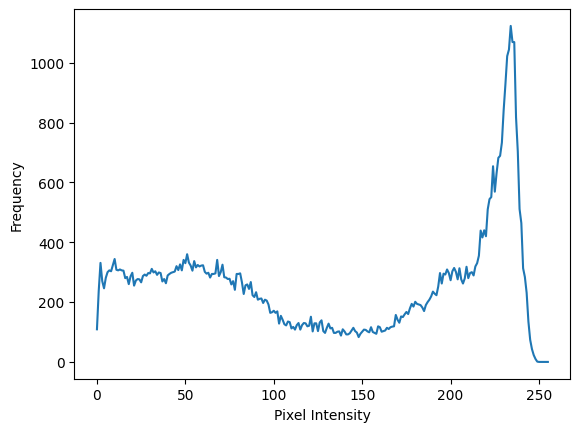

In [204]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

Most of the pixels have an intensity of approximately 240 and have a low amount of intensity at other ranges. Next, a box plot is shown for the mean, median, and variance within the pixels on the images.

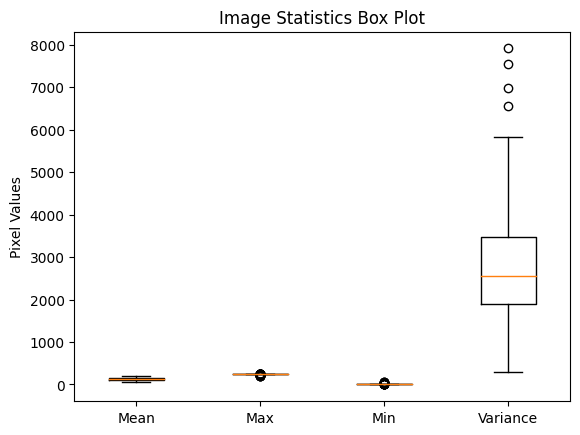

In [215]:
# Create empty lists to store the calculated values
mean_values = []
max_values = []
min_values = []
variance_values = []

# Iterate over the files
for file_name in file_list:
    # Join the folder path with the file name to get the complete file path
    file_path = os.path.join(folder_path, file_name)
    
    # Load the image
    image = io.imread(file_path)
    
    # Calculate the mean, min, max, and variance of the image
    mean_value = np.mean(image)
    min_value = np.min(image)
    max_value = np.max(image)
    variance_value = np.var(image)
    
    # Append the calculated values to the lists
    mean_values.append(mean_value)
    max_values.append(max_value)
    min_values.append(min_value)
    variance_values.append(variance_value)

# Create a dictionary to store the calculated values
data = {
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Variance": variance_values
}

# Convert the dictionary to a list of arrays
data_list = [np.array(values) for values in data.values()]

# Create a box plot of the calculated values
plt.boxplot(data_list, labels=data.keys())
plt.ylabel("Pixel Values")
plt.title("Image Statistics Box Plot")
plt.show()


The median, max, and the min values didn't vary much for the images and were combined with a large variance. This meant that the images were very similar to each other which was promising for the GAN.

## Result

Next, the GAN is generated with an array of epochs and batch sizes. This a standard GAN network with a discriminator network. The GAN network produces the model while the discriminator keeps the network in check and removes noise. ReLU is the activation of choice for many image analysis and the sigmoidal output is to generate a 0 to 1 signal.

In [220]:
# Generator Network
generator = keras.Sequential([
    layers.Dense(256, input_dim=100, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(784, activation='tanh')
])

# Discriminator Network
discriminator = keras.Sequential([
    layers.Dense(1024, input_dim=784, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

The model is combined and compiled with standard GAN optimizers and losses.

In [217]:
# Combined Model (GAN)
model = keras.Sequential([generator, discriminator])
model.compile(optimizer='adam', loss='binary_crossentropy')

The GAN is then ran with a range for the epoch size and batch size. Note, the GAN needs to be reinstated before each epoch so the model can start fresh with each run. The model is run and the output is shown below. 

In [223]:
# Set batch size
batch_size = 32

for epoch in range(1, 3): # 1 to 2

    ####################
    # Generator Network
    generator = keras.Sequential([
        layers.Dense(256, input_dim=100, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(784, activation='tanh')
    ])

    # Discriminator Network
    discriminator = keras.Sequential([
        layers.Dense(1024, input_dim=784, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Combined Model (GAN)
    model = keras.Sequential([generator, discriminator])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    ####################
    
    for batch_size in range(16, 33, 16): # 16 and 32
        print("Epoch:", epoch)
        print("Batch Size:", batch_size)

        for batch in range(0, len(images), batch_size):
            batch_images = images[batch:batch + batch_size]

            # Generate Noise
            noise = tf.random.normal([batch_size, 100])

            # Create labels for real and fake images
            real = tf.ones((batch_size, 1))
            fake = tf.zeros((batch_size, 1))

            # Train the generator to minimize the GAN loss
            gan_loss = model.train_on_batch(noise, real)
            print("GAN Loss:", gan_loss)

Epoch: 1
Batch Size: 16
GAN Loss: 0.7305040955543518
GAN Loss: 0.07189919054508209
GAN Loss: 0.00014384924725163728
GAN Loss: 8.996506650760239e-09
GAN Loss: 1.0312205733428725e-12
GAN Loss: 1.7085629585266285e-18
GAN Loss: 6.084823372158909e-25
GAN Loss: 6.660879494019211e-31
GAN Loss: 1.6069016959290286e-34
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
Epoch: 1
Batch Size: 32
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
Epoch: 2
Batch Size: 16
GAN Loss: 0.7092685699462891
GAN Loss: 0.08187876641750336
GAN Loss: 0.00015447891200892627
GAN Loss: 9.514100618446264e-09
GAN Loss: 4.846839075922649e-14
GAN Loss: 4.9395048273338566e-20
GAN Loss: 8.200552757304255e-25
GAN Loss: 3.0649919049209005e-32
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss: 0.0
GAN Loss:

## Hyperparameter Analysis

When it comes to the GAN loss and the epoch number, the loss was deemed negligable with a batch size of 16 and an epoch size of 1. Thus, not further improvement was needed and there is no need to extra epochs or larger batch sizes.

## Discussion and Conclusion

#### Lessons Learned

Each time the block is run trains the GAN, the model is refined. Thus, during debugging it was quickly learned to start from the top of the model within the GAN and discriminator. There were issues with the images being processed in the model, but this was found out to be caused by the image size. Thus, the preprocessing step was done to ensure that this wasn't an issue any longer.

#### Mistakes

After, the GAN model had multiple evaluation methods for different types of loss. That combined other additional steps of generating images turned out to be messy when it came to debugging. Thus, these were removed and saved for a future project.

#### Future Improvement Opportunities

To expand upon this model, discriminator loss can be evaluated as well as the generation of Monet style artwork through an image generator.